In [10]:
cd(@__DIR__)
include("../AR/utils/utils.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")
include("PhenoPlot.jl")

Plot_Pheno_Dates_DB_BB (generic function with 2 methods)

## Apple phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > C \} $  
Budburst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > H \} $  
$C$, $H$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

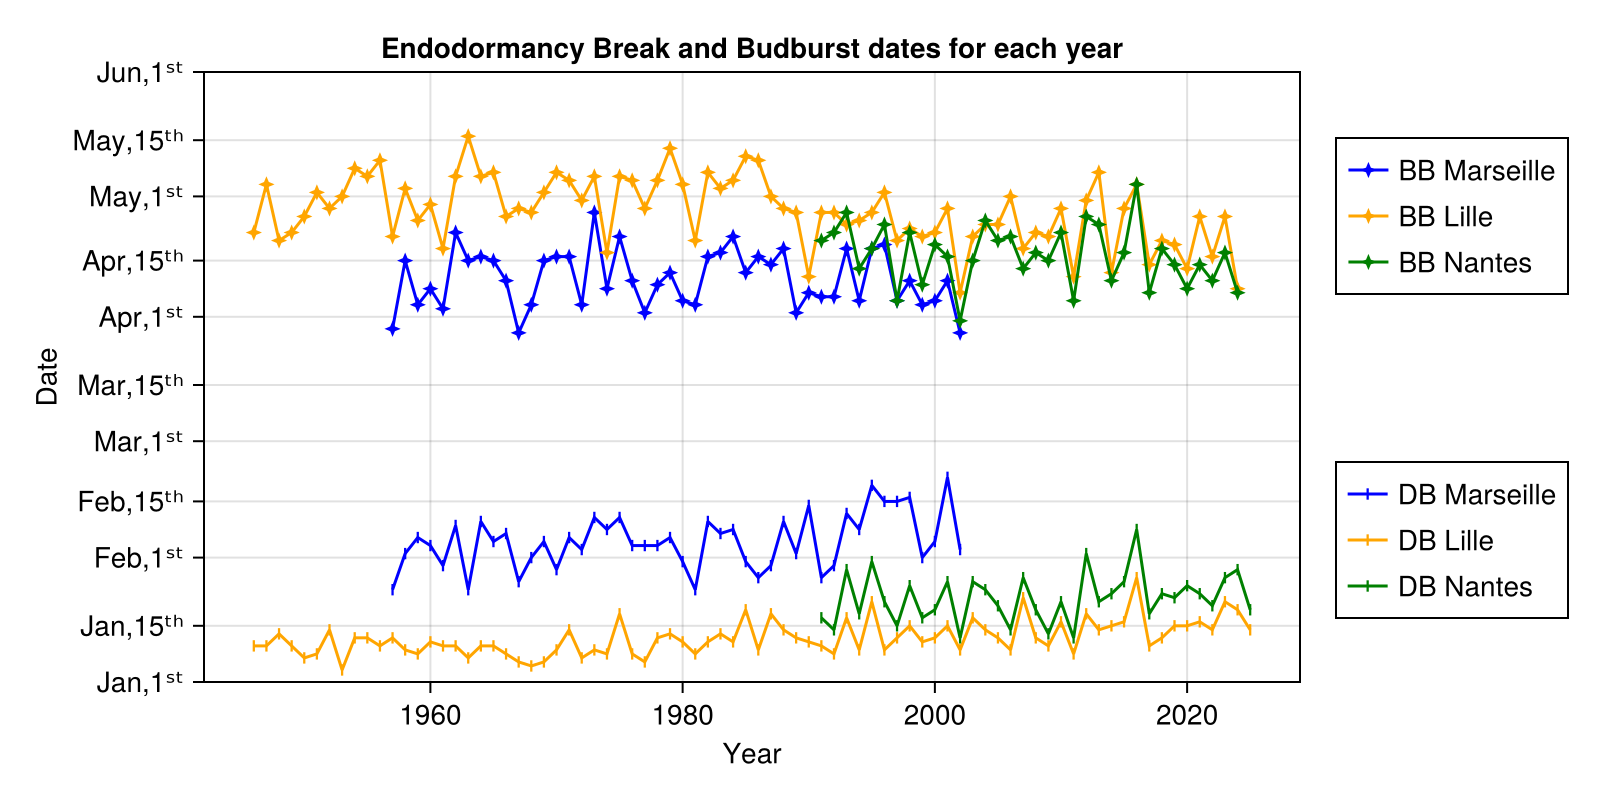

CairoMakie.Screen{IMAGE}


In [12]:
DB_Marseille, BB_Marseille = Apple_Phenology_Pred(initTG("TG_STAID000031.txt"))
DB_Lille, BB_Lille = Apple_Phenology_Pred(initTG("TG_STAID000737.txt"))
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(initTG("TG_STAID000742.txt"))

colors = ["blue","orange","green"]

fig = Plot_Pheno_Dates_DB_BB([DB_Marseille, DB_Lille, DB_Nantes],
    [BB_Marseille, BB_Lille, BB_Nantes],
    (8, 1),
    DB_label=["DB Marseille", "DB Lille", "DB Nantes"],
    BB_label=["BB Marseille", "BB Lille", "BB Nantes"],
    DB_colors = colors,
    BB_colors = colors
    )

save("Presentation/Apple_pheno.pdf",fig,; px_per_unit=2.0)
display(fig)

## Vine phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > Cc \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > Ghc \} $  
$Cc$, $Ghc$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

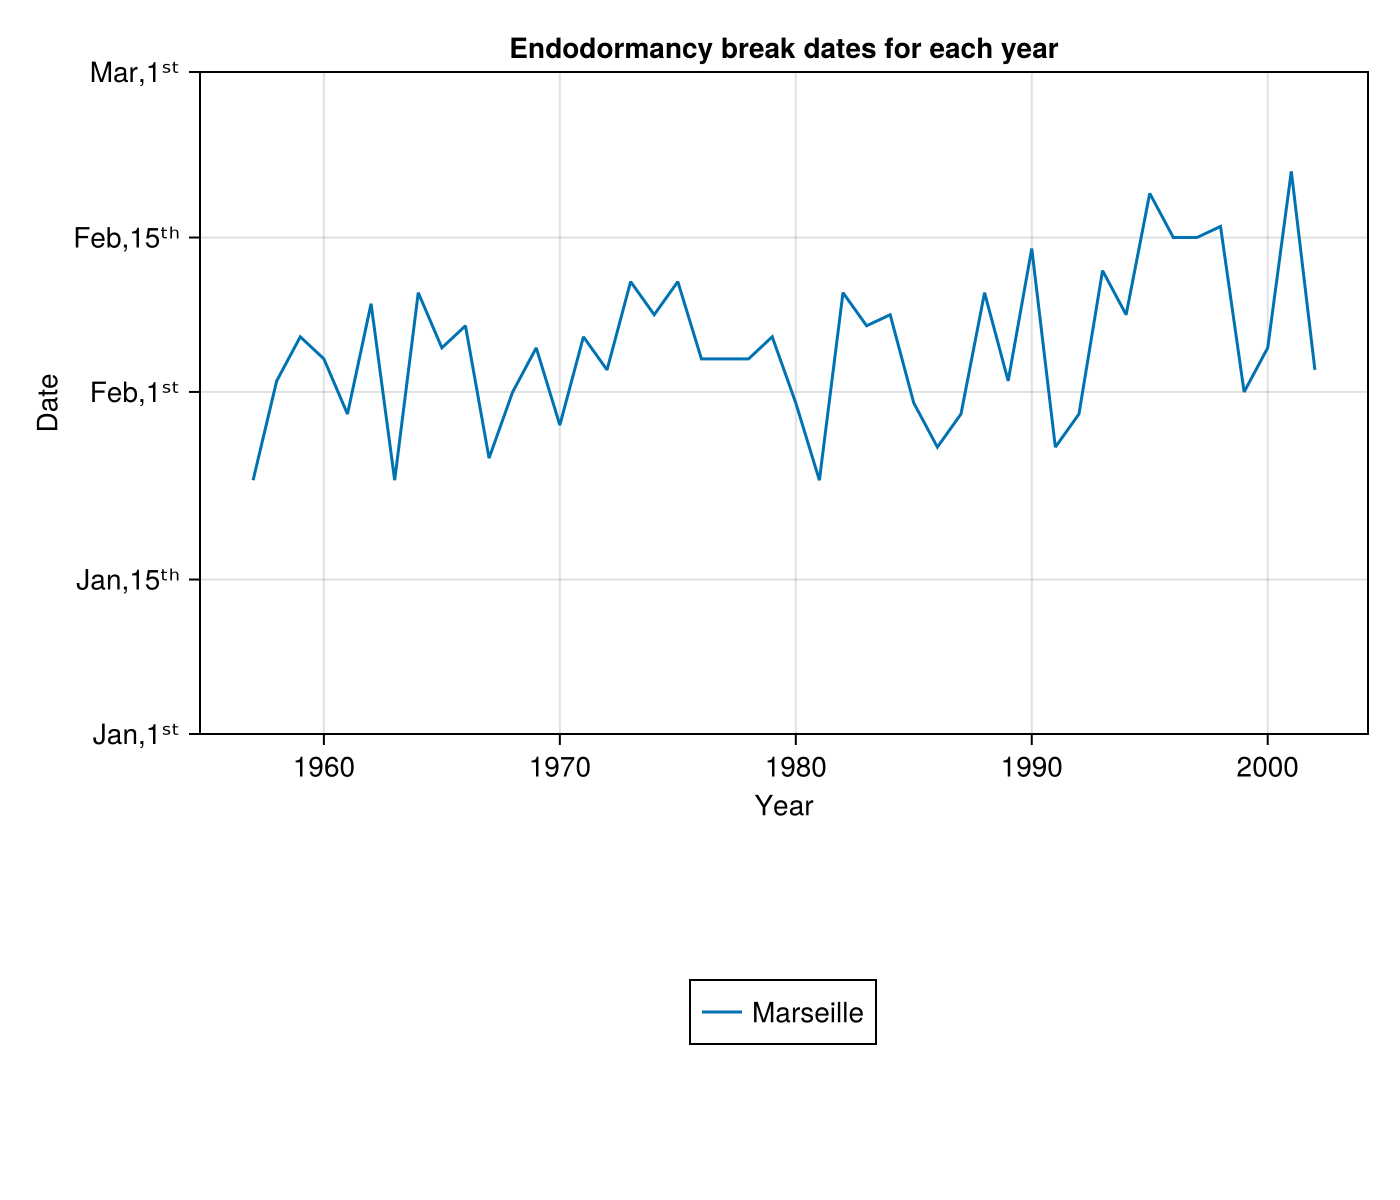

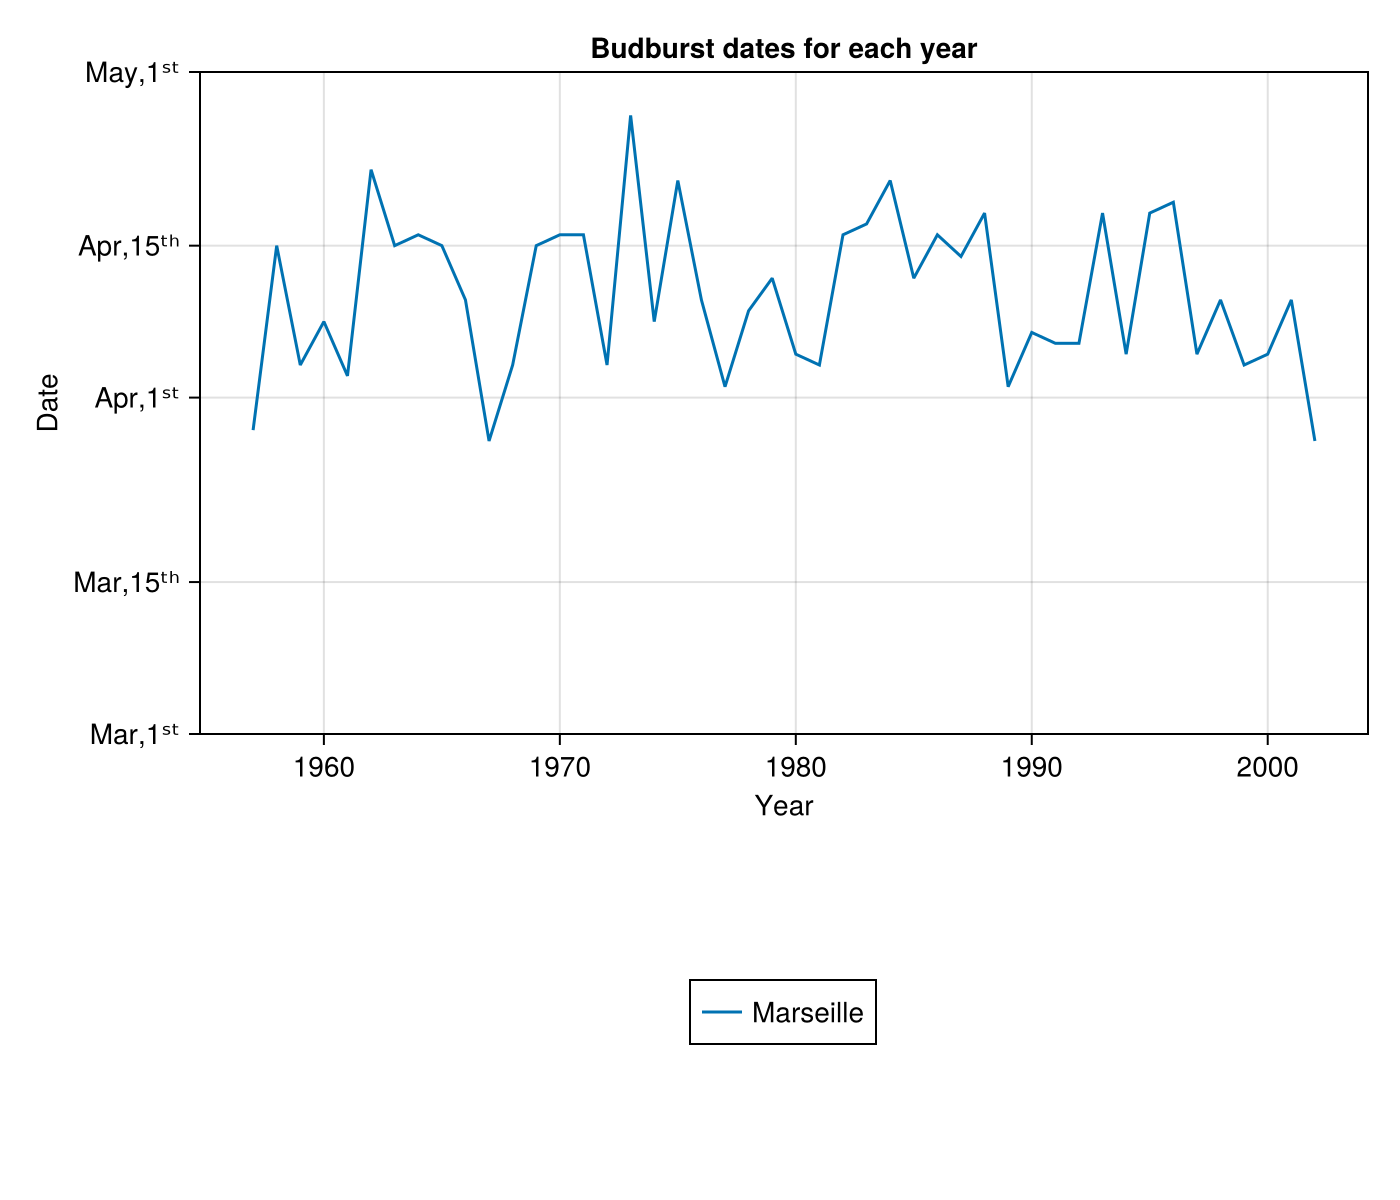

  21.135 ms (139538 allocations: 15.34 MiB)


CairoMakie.Screen{IMAGE}


In [13]:
include("PhenoPred.jl")
using BenchmarkTools

@btime DB_Marseille, BB_Marseille = Vine_Phenology_Pred("TN_STAID000031.txt", "TX_STAID000031.txt")

display(Plot_Pheno_Dates([DB_Marseille], (8, 1), title="Endodormancy break", labelvec=["Marseille"]))
display(Plot_Pheno_Dates([BB_Marseille], (8, 1), title="Budburst", labelvec=["Marseille"], BB=true))

Using a VinePhenoModel structure

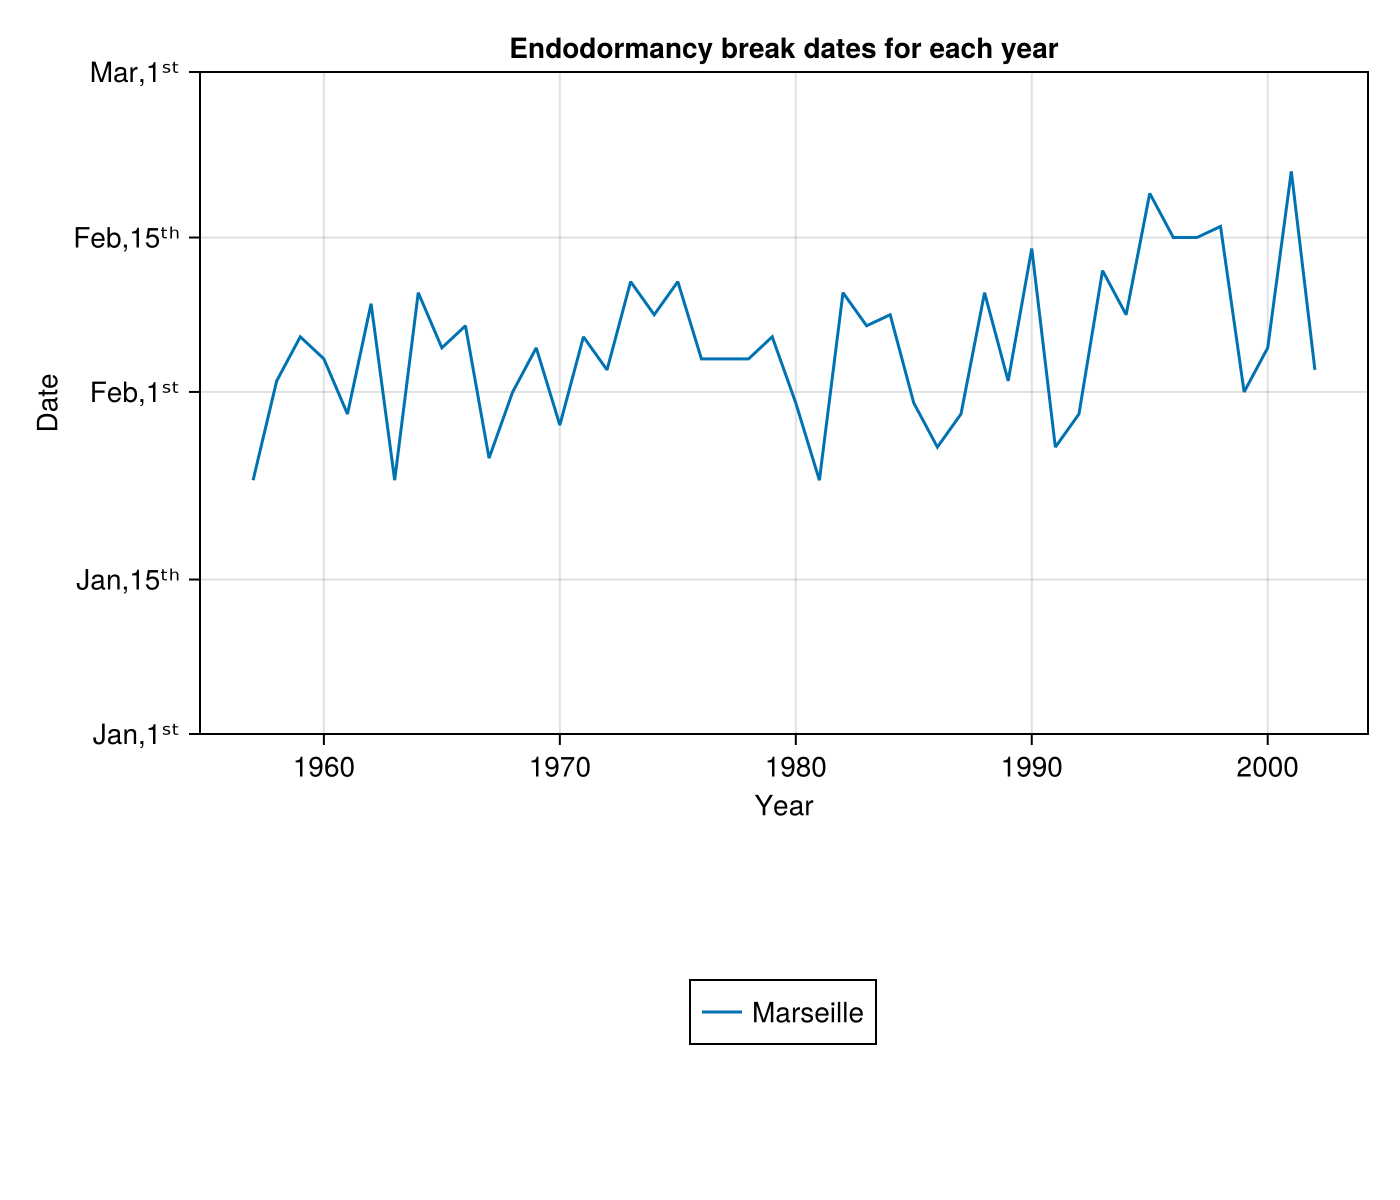

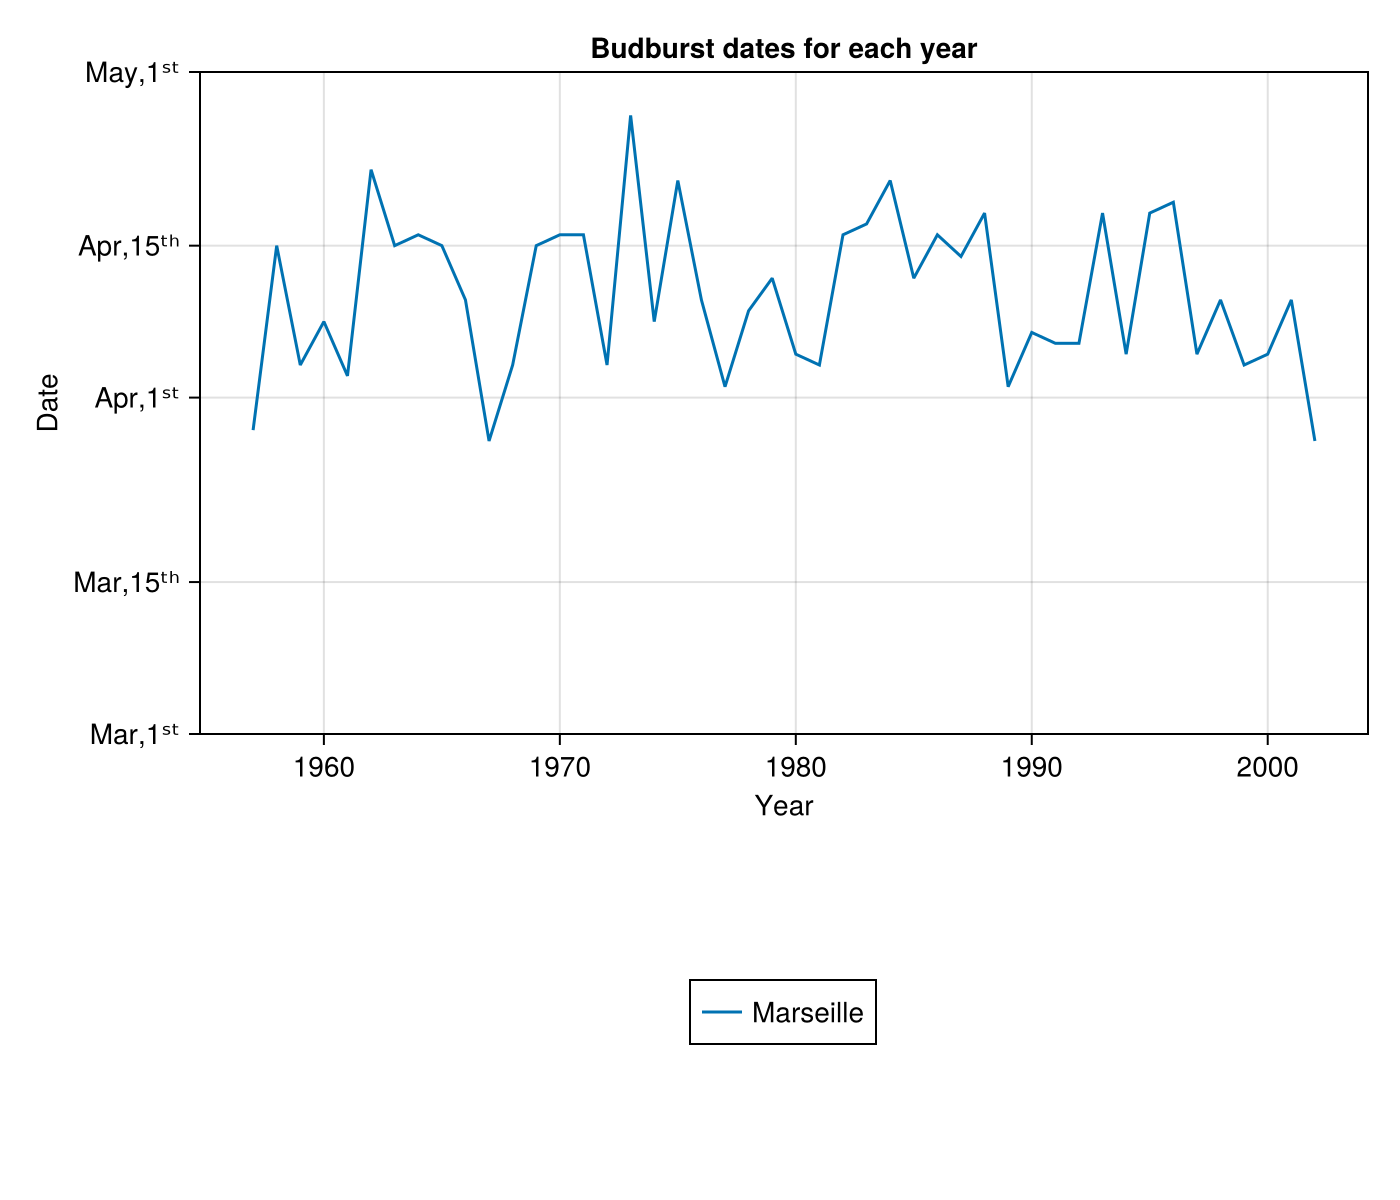

  32.078 ms (745963 allocations: 26.83 MiB)


CairoMakie.Screen{IMAGE}


In [14]:
@btime DB_Marseille, BB_Marseille = Vine_Phenology_Pred(InitVinePhenoModel("TN_STAID000031.txt", "TX_STAID000031.txt"))

display(Plot_Pheno_Dates([DB_Marseille], (8, 1), title="Endodormancy break", labelvec=["Marseille"]))
display(Plot_Pheno_Dates([BB_Marseille], (8, 1), title="Budburst", labelvec=["Marseille"]), BB=true)

In [16]:
DB_Marseille, BB_Marseille = Vine_Phenology_Pred("TN_STAID000031.txt", "TX_STAID000031.txt")
DB_Lille, BB_Lille = Vine_Phenology_Pred("TN_STAID000737.txt", "TX_STAID000737.txt")
DB_Nantes, BB_Nantes = Vine_Phenology_Pred("TN_STAID000742.txt", "TX_STAID000742.txt")

colors = ["blue","orange","green"]

fig = Plot_Pheno_Dates_DB_BB([DB_Marseille, DB_Lille, DB_Nantes],
    [BB_Marseille, BB_Lille, BB_Nantes],
    (8, 1),
    DB_label=["DB Marseille", "DB Lille", "DB Nantes"],
    BB_label=["BB Marseille", "BB Lille", "BB Nantes"],
    DB_colors = colors,
    BB_colors = colors
    )
save("Presentation/Gvine_pheno.pdf", fig, ; px_per_unit=2.0)
display(fig)

CairoMakie.Screen{IMAGE}


Phenology of apple with generated data from a model trained on Marseille records

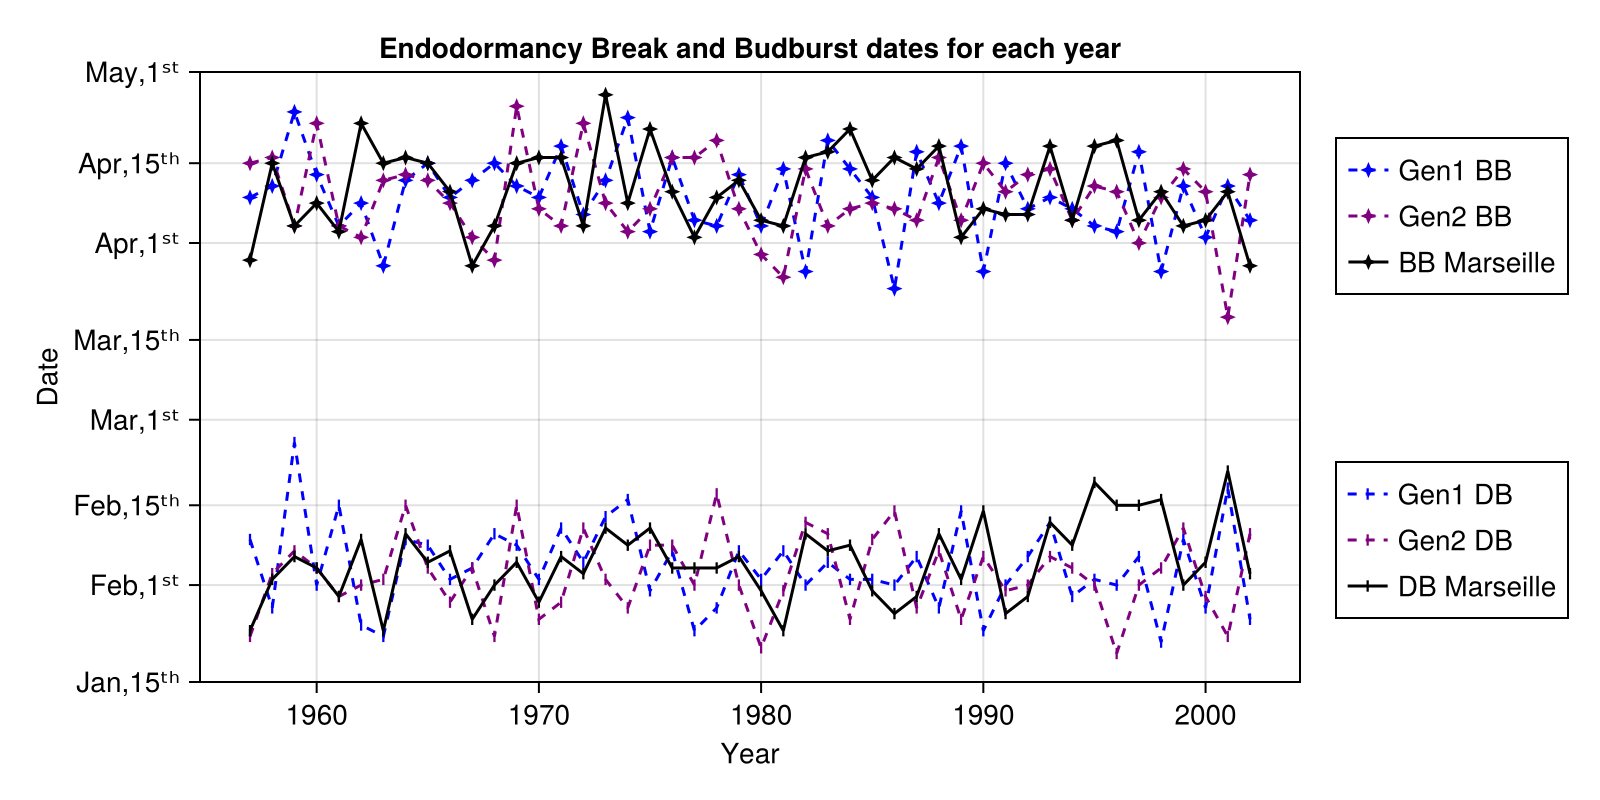

CairoMakie.Screen{IMAGE}


In [17]:
include("../AR/utils/Structure.jl")
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series("TG_STAID000031.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 2)

DB_Marseille, BB_Marseille = Apple_Phenology_Pred(x, date_vec)
Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack

colors = ["blue", "purple", "black"]
fig  = Plot_Pheno_Dates_DB_BB([Tab[1, :]; [DB_Marseille]],
[Tab[2, :]; [BB_Marseille]],
(10, 30),
DB_label=[["Gen$(i) DB" for i in 1:2]; "DB Marseille"],
DB_colors=colors,
BB_label=[["Gen$(i) BB" for i in 1:2]; "BB Marseille"],
BB_colors=colors,
dashindexes=[1,2])
save("Presentation/3phenos.pdf",fig,; px_per_unit=2.0)
display(fig)

Marseille

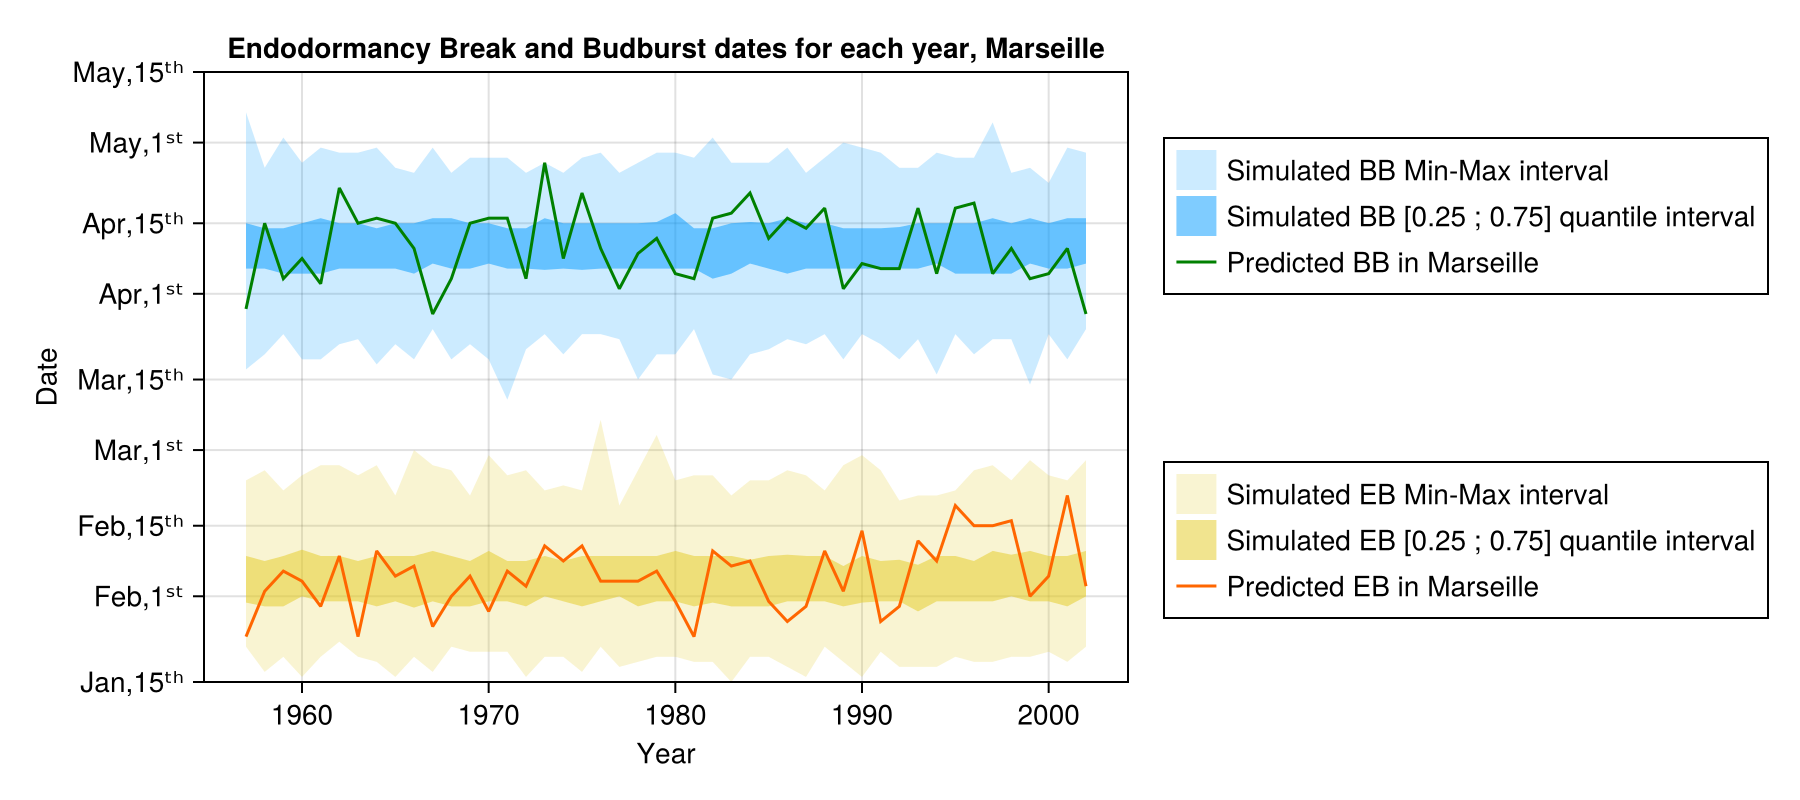

CairoMakie.Screen{PDF}


In [18]:
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series("TG_STAID000031.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Marseille, BB_Marseille = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Marseille, BB_Marseille, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name = "Marseille"
)
display(fig)
save("Presentation/Marseille_sim.pdf",fig,; px_per_unit=2.0)

Lille

In [19]:
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series("TG_STAID000737.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Lille, BB_Lille = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 50)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Lille, BB_Lille, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name = "Lille"
)
display(fig)
save("Presentation/Lille_sim.pdf",fig,; px_per_unit=2.0)

CairoMakie.Screen{PDF}


Nantes

In [20]:
series = extract_series("TG_STAID000742.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Nantes, BB_Nantes, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name = "Nantes"
)
display(fig)
save("Presentation/Nantes_sim.pdf", fig ; px_per_unit=2.0)

CairoMakie.Screen{PDF}
